
# Data fields details
## Here's a brief version of what you'll find in the data description file.

######  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
###### MSSubClass: The building class
###### MSZoning: The general zoning classification
###### LotFrontage: Linear feet of street connected to property
###### LotArea: Lot size in square feet
###### Street: Type of road access
###### Alley: Type of alley access
###### LotShape: General shape of property
###### LandContour: Flatness of the property
###### Utilities: Type of utilities available
###### LotConfig: Lot configuration
###### LandSlope: Slope of property
###### Neighborhood: Physical locations within Ames city limits
###### Condition1: Proximity to main road or railroad
###### Condition2: Proximity to main road or railroad (if a second is present)
###### BldgType: Type of dwelling
###### HouseStyle: Style of dwelling
###### OverallQual: Overall material and finish quality
###### OverallCond: Overall condition rating
###### YearBuilt: Original construction date
###### YearRemodAdd: Remodel date
###### RoofStyle: Type of roof
###### RoofMatl: Roof material
###### Exterior1st: Exterior covering on house
###### Exterior2nd: Exterior covering on house (if more than one material)
###### MasVnrType: Masonry veneer type
###### MasVnrArea: Masonry veneer area in square feet
###### ExterQual: Exterior material quality
###### ExterCond: Present condition of the material on the exterior
###### Foundation: Type of foundation
###### BsmtQual: Height of the basement
###### BsmtCond: General condition of the basement
###### BsmtExposure: Walkout or garden level basement walls
###### BsmtFinType1: Quality of basement finished area
###### BsmtFinSF1: Type 1 finished square feet
###### BsmtFinType2: Quality of second finished area (if present)
###### BsmtFinSF2: Type 2 finished square feet
###### BsmtUnfSF: Unfinished square feet of basement area
###### TotalBsmtSF: Total square feet of basement area
###### Heating: Type of heating
###### HeatingQC: Heating quality and condition
###### CentralAir: Central air conditioning
###### Electrical: Electrical system
###### 1stFlrSF: First Floor square feet
###### 2ndFlrSF: Second floor square feet
###### LowQualFinSF: Low quality finished square feet (all floors)
###### GrLivArea: Above grade (ground) living area square feet
###### BsmtFullBath: Basement full bathrooms
###### BsmtHalfBath: Basement half bathrooms
###### FullBath: Full bathrooms above grade
###### HalfBath: Half baths above grade
###### Bedroom: Number of bedrooms above basement level
###### Kitchen: Number of kitchens
###### KitchenQual: Kitchen quality
###### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
###### Functional: Home functionality rating
###### Fireplaces: Number of fireplaces
###### FireplaceQu: Fireplace quality
###### GarageType: Garage location
###### GarageYrBlt: Year garage was built
###### GarageFinish: Interior finish of the garage
###### GarageCars: Size of garage in car capacity
###### GarageArea: Size of garage in square feet
###### GarageQual: Garage quality
###### GarageCond: Garage condition
###### PavedDrive: Paved driveway
###### WoodDeckSF: Wood deck area in square feet
###### OpenPorchSF: Open porch area in square feet
###### EnclosedPorch: Enclosed porch area in square feet
###### SsnPorch: Three season porch area in square feet
###### ScreenPorch: Screen porch area in square feet
###### PoolArea: Pool area in square feet
###### PoolQC: Pool quality
###### Fence: Fence quality
###### MiscFeature: Miscellaneous feature not covered in other categories
###### MiscVal: $Value of miscellaneous feature
###### MoSold: Month Sold
###### YrSold: Year Sold
###### SaleType: Type of sale
###### SaleCondition: Condition of sale

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we are reading the test data set and coverting it from a CSV file to a Pickle file:

This data file has 80 different variables that some consist of missing values


In [0]:
import pickle
import pandas as pd
test= pd.read_csv('test.csv')

pickle_out=open('test.pkl','wb')
pickle.dump(test, pickle_out)
pickle_out.close()

pickle_in= open('test.pkl','rb')
test_data= pickle.load(pickle_in)

test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Here we are reading the train data set and coverting it from a CSV file to a Pickle file:

This data file has 81 different variables that some consist of missing values

In [0]:
import pickle
import pandas as pd
train= pd.read_csv('train.csv')

pickle_out=open('train.pkl','wb')
pickle.dump(train, pickle_out)
pickle_out.close()

pickle_in= open('train.pkl','rb')
train_data= pickle.load(pickle_in)

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The .describe() gives the statistic break down of the variable SalePrice in the train data set

In [0]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

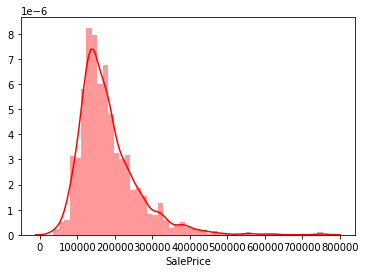

In [0]:
#histogram showing the sale price difference
sns.distplot(train_data['SalePrice'], color = 'red');

### This histogram shows that the variable 'SalePrice':

#### - Deviate from the normal distribution. 
This indicates that the data is spread out over a large range of values, which can be observed in the histogram.
##### - Have appreciable positive skewness. 
This means that when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.
##### - Show peakedness.



In [0]:
#skewness and kurtosis of variable 'Saleprice'
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


###### As we discover that the skewness of the histogram of the variable 'SalePrice' is 1.882876, we can conclude that the normal distribution is not symmetrical, since its skewness is by far more than 0.

##### As for the kurtosis or peakness of the graph we discover that the dataset has heavier tails than a normal distribution (more in the tails), since its kurtosis 6.536282 is by far greater than 3.



Text(0.5, 1.0, 'Scatter plot\n Ground Living Area vs Sale Price')

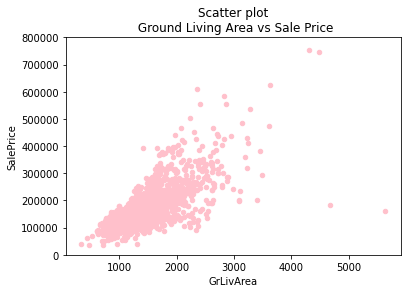

In [0]:
#scatter plot grlivarea/saleprice
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis=1)
data.plot.scatter(x = 'GrLivArea', y ='SalePrice', ylim = (0,800000), color = 'pink');
plt.title('Scatter plot\n Ground Living Area vs Sale Price')

##### As far as the variables 'SalePrice' and 'GrLivArea', we can conclude that they have more or less a linear relationship. 

Text(0.5, 1.0, 'Scatter plot\n Total Rooms (No bathrooms) vs Sale Price')

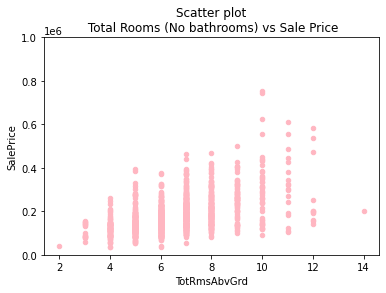

In [0]:
#scatter plot totalbsmtsf/saleprice
data = pd.concat([train_data['SalePrice'], train_data['TotRmsAbvGrd']], axis=1)
data.plot.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', ylim=(0,1000000), color = 'lightpink' );
plt.title('Scatter plot\n Total Rooms (No bathrooms) vs Sale Price')

Now, looking at the scatter plot between the following variables 'SalePrice', and 'TotRmsAbvGrd' we can conclude that the total number of rooms and the price is heavily related. The higher the price, the more rooms the house is more likely to have. 

In both the train and the test data sets there is one column that has no meaning to the rest in this case it is the Id column.

Now here we remove the Id column in both data sets.

Now we show the amount of data before and after removing the Id column.

In [0]:
print("Train data size before dropping Id is : {} " .format(train_data.shape))
print("Test data size before dropping Id is : {} " .format(test_data.shape))

train_data_ID = train_data['Id']
test_data_ID = test_data['Id']

train_data.drop("Id", axis= 1, inplace= True)
test_data.drop("Id", axis= 1, inplace= True)

print("Train data size after dropping Id is : {} ".format(train_data.shape))
print("Test data size before dropping Id is : {} " .format(test_data.shape))

Train data size before dropping Id is : (1460, 81) 
Test data size before dropping Id is : (1459, 80) 
Train data size after dropping Id is : (1460, 80) 
Test data size before dropping Id is : (1459, 79) 


Now we combind the data from the test and the train data sets into one vector called df_combined.

Then project the combined amount from the new data frame vector.

In [0]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train.SalePrice.values
df_combined = pd.concat((train_data, test_data)).reset_index(drop=True)
print("df_combined size is : {}" .format(df_combined.shape))

df_combined size is : (2919, 80)


In [0]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Here we find all of the missing values in the combined data frame.

Use the missing data to make ratios of each.

In [0]:
df_combined_na = (df_combined.isnull().sum()/ len(df_combined)) * 100
df_combined_na = df_combined_na.drop(df_combined_na[df_combined_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_combined_na})
missing_data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871


One by one we drop all of the missing data from the new data frame.

In [0]:
df_combined['PoolQC']= df_combined['PoolQC'].fillna('None')

In [0]:
df_combined['MiscFeature']= df_combined['MiscFeature'].fillna('None')

In [0]:
df_combined['Alley']= df_combined['Alley'].fillna('None')

In [0]:
df_combined['Fence']= df_combined['Fence'].fillna('None')

In [0]:
df_combined['FireplaceQu']= df_combined['FireplaceQu'].fillna('None')

In [0]:
df_combined['LotFrontage'] = df_combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_combined[col] = df_combined[col].fillna('None')

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_combined[col] = df_combined[col].fillna(0)

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_combined[col] = df_combined[col].fillna(0)

In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_combined[col] = df_combined[col].fillna('None')

In [0]:
df_combined['MasVnrType']= df_combined['MasVnrType'].fillna('None')

In [0]:
df_combined['MasVnrArea']= df_combined['MasVnrArea'].fillna(0)

In [0]:
df_combined['MSZoning']= df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])

In [0]:
df_combined = df_combined.drop(['Utilities'], axis=1)

In [0]:
df_combined['Functional']= df_combined['Functional'].fillna('Typ')

In [0]:
df_combined['Electrical']= df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])

In [0]:
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])

In [0]:
for col in ('Exterior1st', 'Exterior2nd'):
    df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

In [0]:
df_combined['SaleType'] = df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0])

In [0]:
df_combined['MSSubClass']= df_combined['MSSubClass'].fillna('None')

In [0]:
df_combined['SalePrice']= df_combined['SalePrice'].fillna('None')

Check to see if there is anymore missing data left.

If so use the data to make ratios of the data.

In [0]:
df_combined_na = (df_combined.isnull().sum()/ len(df_combined)) * 100
df_combined_na = df_combined_na.drop(df_combined_na[df_combined_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_combined_na})
missing_data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871


In [0]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Making a new column of data called TotalSF by adding TotalBsmtSF, 1stFlrSF, and 2ndFlrSF together.

In [0]:
df_combined['TotalSF'] = df_combined['TotalBsmtSF'] + df_combined['1stFlrSF'] + df_combined['2ndFlrSF']

In [0]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Here we convert all of the columns that are Categorical to numeric values by using LabelEncoder.

In [0]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df_combined['Condition1'] = number.fit_transform(df_combined['Condition1'].astype('str'))
df_combined['Condition2'] = number.fit_transform(df_combined['Condition2'].astype('str'))
df_combined['ExterQual'] = number.fit_transform(df_combined['ExterQual'].astype('str'))
df_combined['ExterCond'] = number.fit_transform(df_combined['ExterCond'].astype('str'))
df_combined['Exterior1st'] = number.fit_transform(df_combined['Exterior1st'].astype('str'))
df_combined['Exterior2nd'] = number.fit_transform(df_combined['Exterior2nd'].astype('str'))
df_combined['Foundation'] = number.fit_transform(df_combined['Foundation'].astype('str'))
df_combined['BsmtQual'] = number.fit_transform(df_combined['BsmtQual'].astype('str'))
df_combined['BsmtCond'] = number.fit_transform(df_combined['BsmtCond'].astype('str'))
df_combined['HouseStyle'] = number.fit_transform(df_combined['HouseStyle'].astype('str'))
df_combined['BldgType'] = number.fit_transform(df_combined['BldgType'].astype('str'))
df_combined['MasVnrType'] = number.fit_transform(df_combined['MasVnrType'].astype('str'))
df_combined['RoofStyle'] = number.fit_transform(df_combined['RoofStyle'].astype('str'))
df_combined['RoofMatl'] = number.fit_transform(df_combined['RoofMatl'].astype('str'))
df_combined['Heating'] = number.fit_transform(df_combined['Heating'].astype('str'))
df_combined['HeatingQC'] = number.fit_transform(df_combined['HeatingQC'].astype('str'))
df_combined['CentralAir'] = number.fit_transform(df_combined['CentralAir'].astype('str'))
df_combined['Electrical'] = number.fit_transform(df_combined['Electrical'].astype('str'))
df_combined['MSZoning'] = number.fit_transform(df_combined['MSZoning'].astype('str'))
df_combined['LotShape'] = number.fit_transform(df_combined['LotShape'].astype('str'))
df_combined['LandContour'] = number.fit_transform(df_combined['LandContour'].astype('str'))
df_combined['LotConfig'] = number.fit_transform(df_combined['LotConfig'].astype('str'))
df_combined['LandSlope'] = number.fit_transform(df_combined['LandSlope'].astype('str'))
df_combined['Neighborhood'] = number.fit_transform(df_combined['Neighborhood'].astype('str'))
df_combined['Street'] = number.fit_transform(df_combined['Street'].astype('str'))
df_combined['Alley'] = number.fit_transform(df_combined['Alley'].astype('str'))
df_combined['BsmtExposure'] = number.fit_transform(df_combined['BsmtExposure'].astype('str'))
df_combined['BsmtFinType1'] = number.fit_transform(df_combined['BsmtFinType1'].astype('str'))
df_combined['BsmtFinType2'] = number.fit_transform(df_combined['BsmtFinType2'].astype('str'))
df_combined['KitchenQual'] = number.fit_transform(df_combined['KitchenQual'].astype('str'))
df_combined['Functional'] = number.fit_transform(df_combined['Functional'].astype('str'))
df_combined['FireplaceQu'] = number.fit_transform(df_combined['FireplaceQu'].astype('str'))
df_combined['GarageType'] = number.fit_transform(df_combined['GarageType'].astype('str'))
df_combined['GarageFinish'] = number.fit_transform(df_combined['GarageFinish'].astype('str'))
df_combined['GarageQual'] = number.fit_transform(df_combined['GarageQual'].astype('str'))
df_combined['GarageCond'] = number.fit_transform(df_combined['GarageCond'].astype('str'))
df_combined['PavedDrive'] = number.fit_transform(df_combined['PavedDrive'].astype('str'))
df_combined['PoolArea'] = number.fit_transform(df_combined['PoolArea'].astype('str'))
df_combined['Fence'] = number.fit_transform(df_combined['Fence'].astype('str'))
df_combined['MiscFeature'] = number.fit_transform(df_combined['MiscFeature'].astype('str'))
df_combined['SaleType'] = number.fit_transform(df_combined['SaleType'].astype('str'))
df_combined['SaleCondition'] = number.fit_transform(df_combined['SaleCondition'].astype('str'))
df_combined['YearBuilt'] = number.fit_transform(df_combined['YearBuilt'].astype('str'))
df_combined['YearRemodAdd'] = number.fit_transform(df_combined['YearRemodAdd'].astype('str'))
df_combined['PoolQC'] = number.fit_transform(df_combined['PoolQC'].astype('str'))
df_combined['YrSold'] = number.fit_transform(df_combined['YrSold'].astype('str'))
df_combined['SalePrice'] = number.fit_transform(df_combined['SalePrice'].astype('str'))
df_combined['LotArea'] = number.fit_transform(df_combined['LotArea'].astype('str'))

df_combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,1586,1,2,3,3,AllPub,4,0,13,2,2,0,5,7,5,60,27,1,1,14,3,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2,8,4,193
1,20,3,80.0,1862,1,2,3,3,AllPub,2,0,9,1,2,0,2,6,8,68,16,1,1,10,13,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,1,8,4,103
2,60,3,68.0,282,1,2,0,3,AllPub,4,0,13,2,2,0,5,7,5,46,26,1,1,14,3,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2,8,4,230
3,70,3,60.0,1850,1,2,0,3,AllPub,0,0,14,2,2,0,5,7,5,92,35,1,1,15,5,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,0,8,0,224
4,60,3,84.0,688,1,2,0,3,AllPub,2,0,22,2,2,0,5,8,5,55,24,1,1,14,3,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2,8,4,294


Split the new combined data frame into a train data frame and a test data frame. Then use linear regression to predict the sales price of the homes based on the other variables.

In [0]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train = df_combined['SalePrice'] 
train.head()

0    193
1    103
2    230
3    224
4    294
Name: SalePrice, dtype: int64

In [0]:
test = df_combined['LotArea'] 
test.head()

0    1586
1    1862
2     282
3    1850
4     688
Name: LotArea, dtype: int64

In [0]:
X_train = np.array(train.iloc[:, :-1].values)
y_train = np.array(train.iloc[:, 1].values)
X_test = np.array(test.iloc[:, :-1].values)
y_test = np.array(test.iloc[:, 1].values)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

plt.plot(X_train, model.predict(X_train), color='green')
plt.show()
print(accuracy)
